In [28]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib as mpl
import math

In [21]:
data=pd.read_csv('./Spectroscopy/530_2_Cal_STD_100_059.csv')

In [22]:
data

,# Wawelength in nm,DARK1,DARK2,DARK3,DARK4,AF1_1,AF1_2,AF1_3,AF1_4,AF2_1,...,AF4_3,AF4_4,AF5_1,AF5_2,AF5_3,AF5_4,WHITE1,WHITE2,WHITE3,WHITE4
0,341.00,1958.0,1925.0,1952.0,2174.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2705.0,2812.0,3243.0,2661.0
1,341.24,1831.0,1917.0,1766.0,1939.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2513.0,2602.0,3259.0,2637.0
2,341.49,1781.0,1629.0,1794.0,1958.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2513.0,2370.0,3230.0,2570.0
3,341.73,2083.0,1983.0,2193.0,2245.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2781.0,2978.0,3333.0,3139.0
4,341.98,2424.0,2362.0,1908.0,2203.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3090.0,3428.0,3292.0,2963.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1816,783.78,2056.0,1689.0,1971.0,2388.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3716.0,2332.0,3547.0,3102.0
1817,784.02,1733.0,1737.0,1783.0,1935.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3251.0,2164.0,3282.0,2495.0
1818,784.27,1765.0,1849.0,1743.0,1936.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3468.0,2194.0,2929.0,2513.0
1819,784.51,2156.0,2105.0,2281.0,2423.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3997.0,2484.0,3608.0,3010.0


In [ ]:
    """
    Spectroscopic data were collected on 131 patients suspected of being affected (or affected) by skin carcinomas during the SpectroLive clinical trial: NCT02956265 (national clinical trial identifier from clinicaltrials.gov). Spectra were acquired in vivo before local anesthesia and surgical resection performed in order to get diagnosis by anatomopathology. Spectra were acquired on three sites located within the surgical spindle: on the suspected lesion itself (L sites), on the surgical margins defined by the surgeon called perilesional (PL) sites, and finally on the surgical spindle edges that are clinically considered (then confirmed by anatomopathology) as non-lesional (NL) sites. One spectroscopic measurement set consist in 24 spectra: 4 spectra corresponding to 4 distances (0.4; 0.6; 0.8; 1 mm) between excitation and emission optical fibers were simultaneously acquired using 6 different excitation light sources sequentially (365, 385, 395, 405, 415 nm to acquire autofluorescence spectra and white broadband light source to acquire diffuse reflectance spectra). A preprocessing pipeline was developed in order to correct raw data acquired on 4 different optical chains, each made of one optical fibers beam, a high-pass optical filter and a spectrometer. Raw data and programs to preprocess them are both provided in the database available online. Then features extraction and machine learning methods (SVM, k-NN, LDA, etc.) were developed to test the ability of spectroscopic data to provide diagnostic assistance in skin carcinomas surgical guidance. Several strategies were tested to evaluate optical spectroscopy’s ability to discriminate between several histological classes: e.g. four histological classes (healthy skin versus actinic keratoses versus in situ carcinomas versus invasive carcinomas) or two classes (invasive versus in situ carcinomas). Such a dataset can be useful for research teams that develop machine learning methods applied to data automated classification whose result is useful to provide diagnostic help to dermatologist or surgeons in charge of skin carcinomas surgical resection. Such data will help them train or test the methods they developed. (2023-07-05)
    """

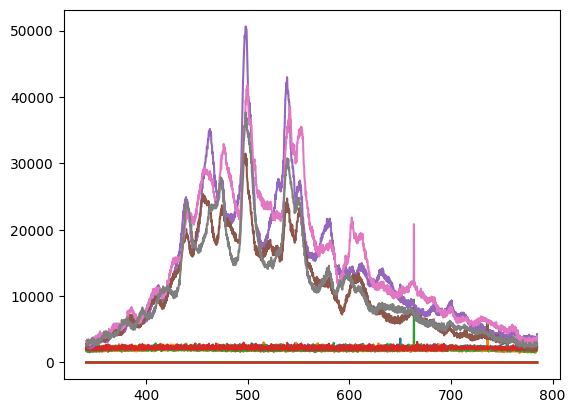

In [35]:
plt.plot(data['# Wawelength in nm'],data.iloc[:,1:])
plt.show()

In [3]:
path_to_series_folder = "./Spectroscopy"
absolute_path='F:\\1Nirma\Spectroscopy\\7_1_Cal_STD_20_011.csv'
relative_path='Spectroscopy\\7_1_Cal_STD_20_011.csv'

In [11]:
files = os.listdir(path_to_series_folder)
print ("files in the folder -",files)
#count the number of csv files in the folder
csv_files = [f for f in files if f.endswith('.csv')]
print ("csv files in the folder -",len(csv_files))
#print file path
file_path = os.path.join(path_to_series_folder, csv_files[0])
print ("file path -",file_path)

files in the folder - ['100_059.json', '1_plot_a_file.html', '20_011.json', '2_pre_process.html', '32_018.json', '7_1_Cal_STD_20_011.csv', 'Readme_SpectroLive_dataset.pdf', 'SkinCare_OpticalSpectrometer.xlsx', 'SpectroLive_custom_script_data_acquisition.pdf']
csv files in the folder - 1
file path - ./Spectroscopy\7_1_Cal_STD_20_011.csv


In [12]:
json_path='./Spectroscopy/20_011.json'

In [13]:
import json
with open(json_path, 'r') as f:
    json_data = json.load(f)

In [14]:
filename = file_path.split("\\")[-1].split(".")[0]
print(filename)

#Look for the given filename in the JSON data
for file_dict in json_data['Files']:
    current_file_name = file_dict['File']['File_Name']
    print(f"Checking file: {current_file_name}")

    if current_file_name == filename:
        file_info = file_dict['File']
        break
else:
    file_info = None

7_1_Cal_STD_20_011
Checking file: 7_1_Cal_STD_20_011


In [15]:
if file_info is not None:
    print(f"\nInformation for {filename}:")
    for key, value in file_info.items():
        print(f"{key}: {value}")
else:
    print(f"\nNo information found for {filename}")


Information for 7_1_Cal_STD_20_011:
File_Name: 7_1_Cal_STD_20_011
Tag: 20_011
Patient_Exam_Number: EX1
Exam_Date: 2017-01-05
Type_of_Site: Calibration Target
Site_Location: Diffuse Reflectance Standard
diagnostic_1: None
diagnostic_2: None
Comment_French: None


In [32]:
mpl.rcParams['font.family'] = 'sans-serif' #set the font of the plots to CMU Concrete (LaTeX font)
mpl.rcParams['axes.unicode_minus'] = False #use this to display the minus sign in the plots, CMU concrete does not have a minus sign
#define the number of point 
SPECTRA_LENGTH_NOT_RESAMPLED = 1821 
x_values_not_resampled = np.linspace(317, 789, SPECTRA_LENGTH_NOT_RESAMPLED)
sources_name = ['DARK',"AF1","AF2","AF3","AF4","AF5","WHITE"]

In [33]:
data = np.genfromtxt(file_path, delimiter=',') #load the data
#Note : dataverse uses ',' as a delimiter, if you use a different delimiter, change it here
file_list = [] #create an empty list
for column_index in range(1,data.shape[1],1): #loop over the columns of the data
    sources=math.ceil(column_index/4) #calculate the source number
    distance=((sources*4)-column_index-4)*-1 #calculate the distance
    dict= { #create a dictionary with the data
        "name"      : sources_name[sources-1] , #name of the source
        "source"    : sources,                  #source number
        "distance"  : distance,                 #distance
        "spectra"   : data[0:,column_index]     #spectra
    }
    file_list.append(dict) #append the dictionary to the list

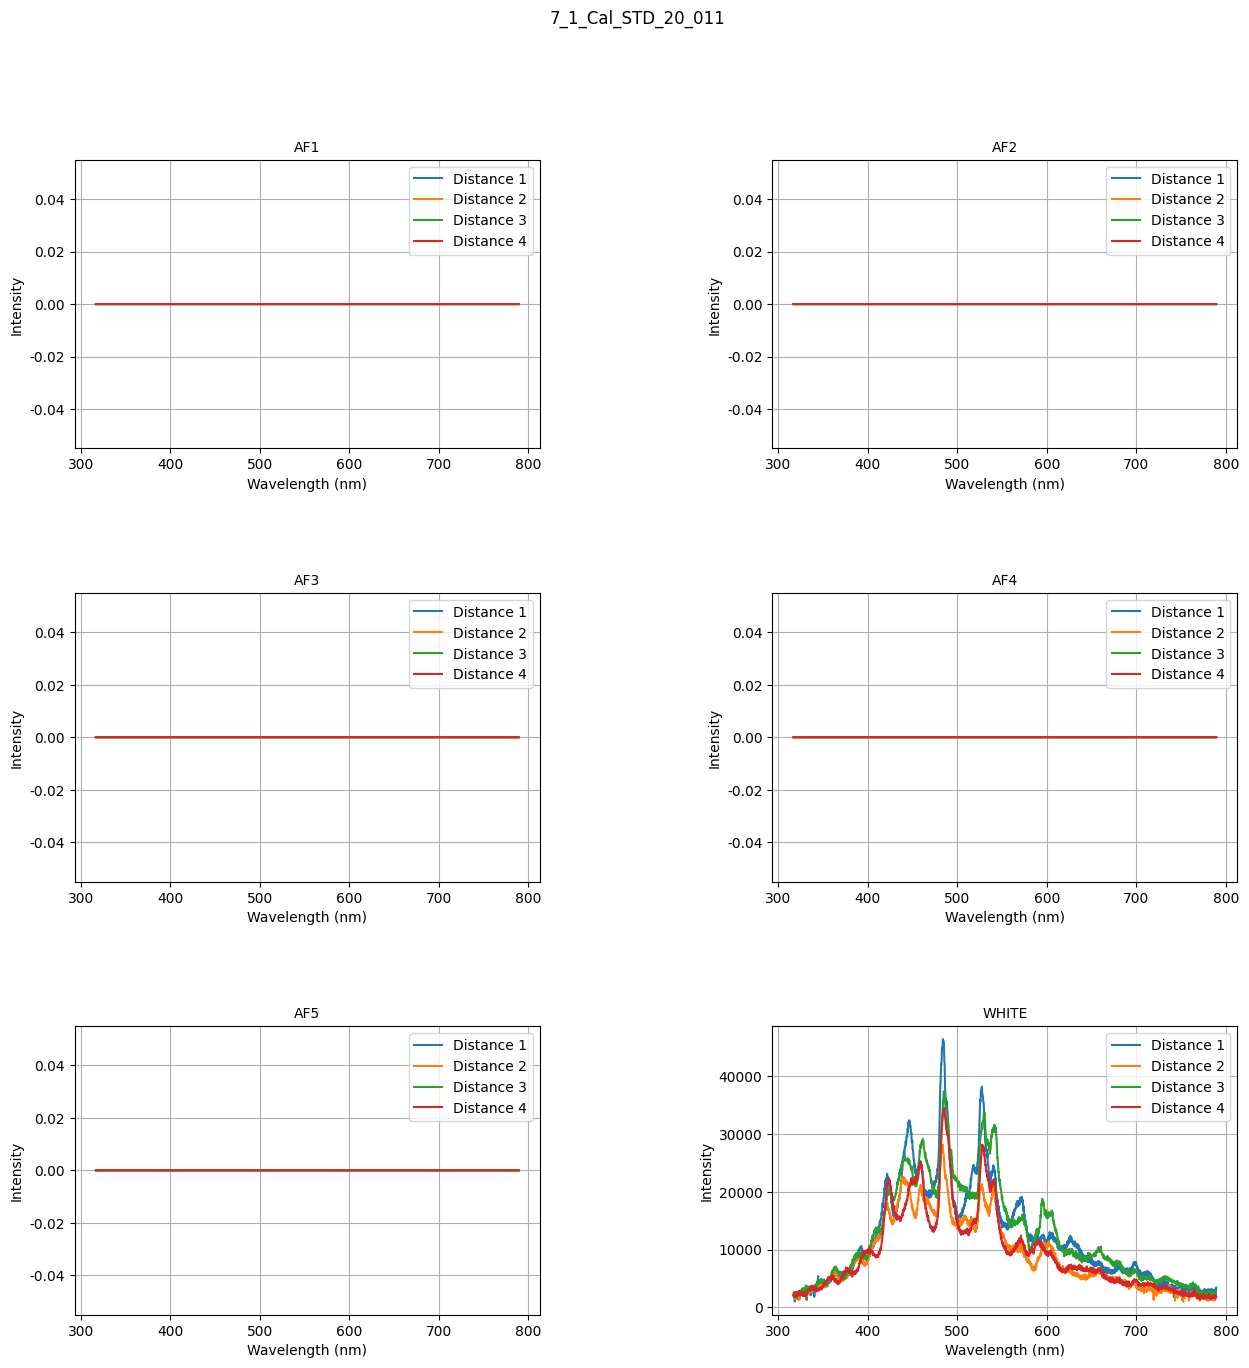

In [34]:
_, axs = plt.subplots(3, 2,figsize=(15,15)) #create 3x2 subplots (3 rows, 2 columns) and set the figure size to 15x15 
axs = axs.flatten() #flatten the axs array to make it easier to iterate over
source_names_to_print = sources_name[1:] #remove the DARK source
distances = range(1, 5, 1) #range of distances to plot

for position, source_name in enumerate(source_names_to_print): #enumerate returns the index and the value of the list
    ax = axs[position] #get the current axis
    ax.set_title(f"{source_name}",fontsize=10) #set the title of the subplot
    ax.set_xlabel("Wavelength (nm)",fontsize=10) #set the x label of the subplot
    ax.set_ylabel("Intensity",fontsize=10) #set the y label of the subplot

    for distance in distances: #iterate over the distances
        spectra_for_distance = [fd["spectra"] for fd in file_list if fd["name"] == source_name and fd["distance"] == distance] #get the spectra for the given source and distance

        for spectrum in spectra_for_distance: #iterate over the spectra
            x_values = x_values_not_resampled #get the x values
            ax.plot(x_values, spectrum) #plot the spectrum
            ax.grid(True)  #add grid to subplot

    ax.legend([f"Distance {d}" for d in distances]) #add the legend to the subplot
plt.subplots_adjust(wspace=0.5, hspace=0.5) #add space between the subplots
plt.suptitle(filename)  #change the window title
plt.show() #show the plot

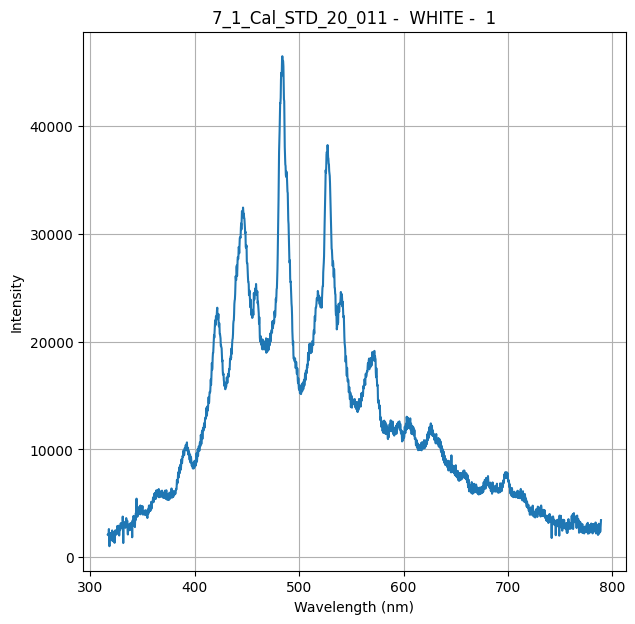

In [35]:
source  = 7
distance = 1
#feel free to change the source and distance (distance [1,2,3,4] source [1,2,3,4,5,6,7])
fig, ax = plt.subplots(1,1,figsize=(7,7))

spectra_for_distance = [fd["spectra"] for fd in file_list if fd["source"] == source and fd["distance"] == distance]     
ax.plot(x_values_not_resampled,spectra_for_distance[0])
#title = filename, source, distance
plt.title(f"{filename} -  {sources_name[source-1]} -  {distance}")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity")
plt.grid(True)
plt.show()

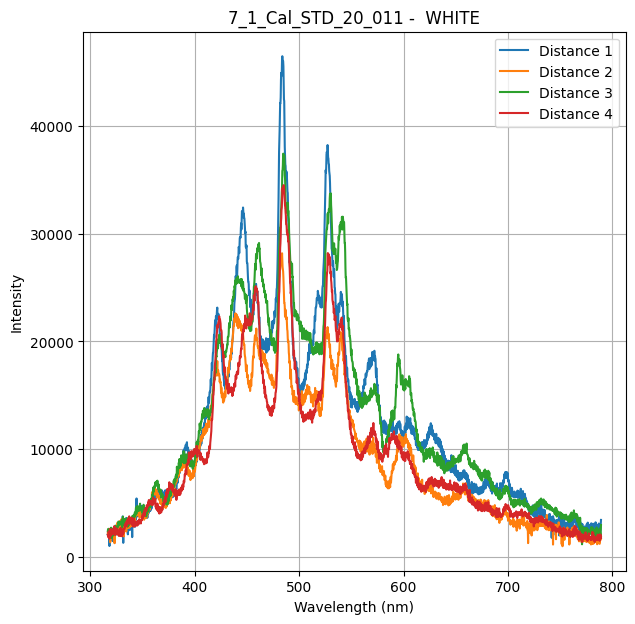

In [36]:
source  = 7
fig, ax = plt.subplots(1,1,figsize=(7,7))

for distance in range(1,5,1):
    spectra_for_distance = [fd["spectra"] for fd in file_list if fd["source"] == source and fd["distance"] == distance] 
    
    for spectrum in spectra_for_distance:
        ax.plot(x_values_not_resampled, spectrum, label=f'Distance {distance}')

source_name = [fd["name"] for fd in file_list if fd["source"] == source][0]
ax.set_title(f"{filename} -  {source_name}")
ax.set_xlabel("Wavelength (nm)")
ax.set_ylabel("Intensity")
ax.legend()  #Display the legend
ax.grid(True)
plt.show()